In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-11-04 13:15:46--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.2’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.009s  

2025-11-04 13:15:47 (95.7 MB/s) - ‘car_fuel_efficiency.csv.2’ saved [874188/874188]



In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("car_fuel_efficiency.csv")

In [4]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [6]:
df.isna().sum(axis=0)

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
df = df.fillna(0)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [10]:
y_full_train = df_full_train["fuel_efficiency_mpg"]
y_train = df_train["fuel_efficiency_mpg"]
y_val = df_val["fuel_efficiency_mpg"]
y_test = df_test["fuel_efficiency_mpg"]

In [11]:
del df_full_train["fuel_efficiency_mpg"]
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

In [12]:
from sklearn.feature_extraction import DictVectorizer

In [13]:
full_train_dicts = df_full_train.to_dict(orient="records")
train_dicts = df_train.to_dict(orient="records")
val_dicts = df_val.to_dict(orient="records")
test_dicts = df_test.to_dict(orient="records")

In [14]:
dv = DictVectorizer(sparse=True)
X_full_train = dv.fit_transform(full_train_dicts)
X_train = dv.transform(train_dicts)
X_val = dv.transform(val_dicts)
X_test = dv.transform(test_dicts)

## Question 1

In [15]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

In [16]:
dtr = DecisionTreeRegressor(max_depth=1)
dtr.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [17]:
feature = dtr.tree_.feature[0]
print(f"Feature used for splitting the data: {dv.get_feature_names_out()[feature]}")

Feature used for splitting the data: vehicle_weight


In [18]:
from matplotlib import pyplot as plt
from sklearn import tree

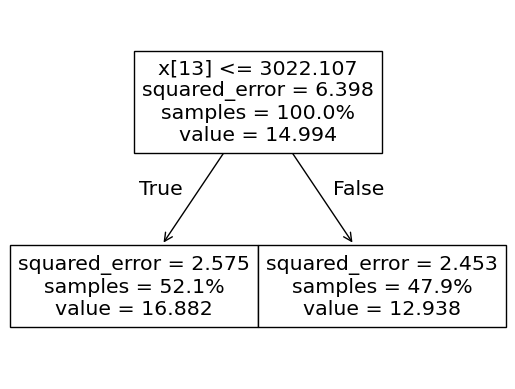

In [19]:
tree.plot_tree(dtr, proportion=True)
plt.show()

## Question 2

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
y_pred = rfr.predict(X_val)

In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE: {rmse:.4f}")

RMSE: 0.4596


## Question 3

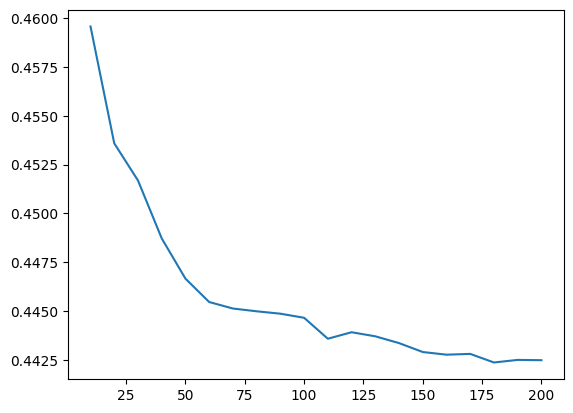

In [25]:
n_estimators_list = range(10, 201, 10)
rmse_values = []
for n_estimators in n_estimators_list:
    rfr = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_values.append((n_estimators, rmse))

df_rmse = pd.DataFrame(rmse_values, columns=["n_estimators", "rmse"])
plt.plot(df_rmse["n_estimators"], df_rmse["rmse"])

In [26]:
for i, rmse in enumerate(df_rmse["rmse"][:-1]):
    if round(rmse, 3) == round(df_rmse["rmse"][i + 1], 3):
        best_n_estimators = df_rmse["n_estimators"][i]
        print(f"The first best lowest n_estimators is {best_n_estimators}")
        break

The first best lowest n_estimators is 60


## Question 4

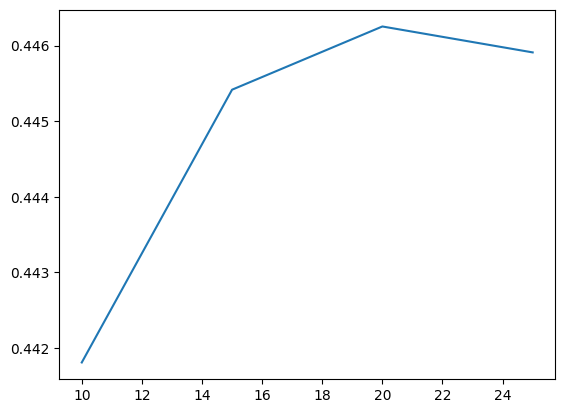

In [27]:
max_depth_list = [10, 15, 20, 25]
n_estimators_list = range(10, 201, 10)
mean_rmse_values = []
for max_depth in max_depth_list:
    rmse_values = []
    for n_estimators in n_estimators_list:
        rfr = RandomForestRegressor(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=1,
            n_jobs=-1
        )
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_values.append(rmse)
        
    mean_rmse_values.append((max_depth, np.mean(rmse_values)))

df_mean_rmse = pd.DataFrame(mean_rmse_values, columns=["max_depth", "mean rmse"])
plt.plot(df_mean_rmse["max_depth"], df_mean_rmse["mean rmse"])

In [28]:
best_max_depth = df_mean_rmse.loc[df_mean_rmse["mean rmse"].idxmin(), "max_depth"]
print(f"The best value for max_depth is {best_max_depth}")

The best value for max_depth is 10


## Question 5

In [29]:
rfr = RandomForestRegressor(
    n_estimators=10,
    max_depth=20,
    random_state=1,
    n_jobs=-1
)
rfr.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
importance_df = pd.DataFrame(
    {"feature": dv.get_feature_names_out(), 'importance': rfr.feature_importances_}
)
print(importance_df.sort_values(by='importance', ascending=False))

                         feature  importance
13                vehicle_weight    0.959150
6                     horsepower    0.015998
0                   acceleration    0.011480
3            engine_displacement    0.003273
7                     model_year    0.003212
8                  num_cylinders    0.002343
9                      num_doors    0.001635
12                    origin=USA    0.000540
11                 origin=Europe    0.000519
10                   origin=Asia    0.000462
5             fuel_type=Gasoline    0.000360
1     drivetrain=All-wheel drive    0.000357
2   drivetrain=Front-wheel drive    0.000345
4               fuel_type=Diesel    0.000325


In [31]:
most_important_feature = importance_df.loc[importance_df["importance"].idxmax(), "feature"]
print(f"The most important feature is {most_important_feature}")

The most important feature is vehicle_weight


## Question 6

In [32]:
import xgboost as xgb

In [33]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [34]:
watchlist = [(dtrain, "train"), (dval, "val")]

In [35]:
xgb_params = {
    "eta": 0.3,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-rmse:1.81393	val-rmse:1.85444
[5]	train-rmse:0.51381	val-rmse:0.55664
[10]	train-rmse:0.37115	val-rmse:0.43896
[15]	train-rmse:0.34666	val-rmse:0.43362
[20]	train-rmse:0.33553	val-rmse:0.43376
[25]	train-rmse:0.32268	val-rmse:0.43683
[30]	train-rmse:0.31475	val-rmse:0.43752
[35]	train-rmse:0.30960	val-rmse:0.43784
[40]	train-rmse:0.30202	val-rmse:0.43968
[45]	train-rmse:0.29126	val-rmse:0.44024
[50]	train-rmse:0.28456	val-rmse:0.44140
[55]	train-rmse:0.27618	val-rmse:0.44225
[60]	train-rmse:0.26768	val-rmse:0.44290
[65]	train-rmse:0.26174	val-rmse:0.44352
[70]	train-rmse:0.25489	val-rmse:0.44531
[75]	train-rmse:0.24792	val-rmse:0.44628
[80]	train-rmse:0.24254	val-rmse:0.44689
[85]	train-rmse:0.23644	val-rmse:0.44749
[90]	train-rmse:0.23193	val-rmse:0.44839
[95]	train-rmse:0.22475	val-rmse:0.44904
[99]	train-rmse:0.21950	val-rmse:0.45018


In [36]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(rmse)

0.45017755678087246


In [37]:
xgb_params = {
    "eta": 0.1,
    "max_depth": 6,
    "min_child_weight": 1,
    "objective": "reg:squarederror",
    "nthread": 8,
    "seed": 1,
    "verbosity": 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5, evals=watchlist)

[0]	train-rmse:2.28944	val-rmse:2.34561
[5]	train-rmse:1.41247	val-rmse:1.44988
[10]	train-rmse:0.91008	val-rmse:0.94062
[15]	train-rmse:0.63402	val-rmse:0.66672
[20]	train-rmse:0.48983	val-rmse:0.53064
[25]	train-rmse:0.41881	val-rmse:0.46891
[30]	train-rmse:0.38342	val-rmse:0.44289
[35]	train-rmse:0.36435	val-rmse:0.43250
[40]	train-rmse:0.35343	val-rmse:0.42746
[45]	train-rmse:0.34621	val-rmse:0.42595
[50]	train-rmse:0.33998	val-rmse:0.42498
[55]	train-rmse:0.33480	val-rmse:0.42449
[60]	train-rmse:0.33054	val-rmse:0.42456
[65]	train-rmse:0.32602	val-rmse:0.42493
[70]	train-rmse:0.32202	val-rmse:0.42503
[75]	train-rmse:0.31895	val-rmse:0.42526
[80]	train-rmse:0.31667	val-rmse:0.42563
[85]	train-rmse:0.31440	val-rmse:0.42574
[90]	train-rmse:0.31059	val-rmse:0.42586
[95]	train-rmse:0.30625	val-rmse:0.42611
[99]	train-rmse:0.30419	val-rmse:0.42623


In [38]:
y_pred = model.predict(dval)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(rmse)

0.42622800553359225


The eta of 0.1 leads to a better RMSE score on the validation dataset.